# RANDOM FOREST MODEL BUILD

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib

In [2]:
# Step 1: Load Train and Test Datasets
train_data = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/train.csv')
test_data = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/test.csv')

In [3]:
 #Splitting features and labels
X_train = train_data.drop(['label'], axis=1)  # Features
y_train = train_data['label']  # Target variable
X_test = test_data.drop(['label'], axis=1)  # Features
y_test = test_data['label']  # Target variable

In [4]:
# Step 2: Splitting training set for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model Creation and Training

In [5]:
# Step 3: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_depth=10,      # Maximum depth of each tree
    random_state=42,   # Random seed for reproducibility
    n_jobs=-1          # Use all available processors
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [6]:
# Step 4: Save the trained model
model_folder = "../../3_Post-Modeling-Phase/Trained_ML_models/Models_CICIDS-2017/"
model_filename = "CICIDS-2017_RandomForest.joblib"
model_path = model_folder + model_filename
joblib.dump(rf_model, model_path)
print(f"Random Forest model saved to: {model_path}")

Random Forest model saved to: ../../3_Post-Modeling-Phase/Trained_ML_models/Models_CICIDS-2017/CICIDS-2017_RandomForest.joblib


In [7]:
# Step 5: Validate the model
y_val_pred = rf_model.predict(X_val)

In [8]:
# Metrics for validation
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='binary')
val_recall = recall_score(y_val, y_val_pred, average='binary')
val_f1 = f1_score(y_val, y_val_pred, average='binary')

In [9]:
print("Validation Results:")
print(f"Accuracy:   {val_accuracy:.2%}")
print(f"Precision:  {val_precision:.2%}")
print(f"Recall:     {val_recall:.2%}")
print(f"F1-score:   {val_f1:.2%}")

Validation Results:
Accuracy:   99.81%
Precision:  99.76%
Recall:     99.89%
F1-score:   99.83%


In [10]:
# Step 6: Test the model
y_test_pred = rf_model.predict(X_test)

In [11]:
# Metrics for test dataset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')

In [12]:
print("Test Results:")
print(f"Accuracy:   {test_accuracy:.2%}")
print(f"Precision:  {test_precision:.2%}")
print(f"Recall:     {test_recall:.2%}")
print(f"F1-score:   {test_f1:.2%}")

Test Results:
Accuracy:   99.68%
Precision:  99.71%
Recall:     99.72%
F1-score:   99.71%


In [13]:
# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

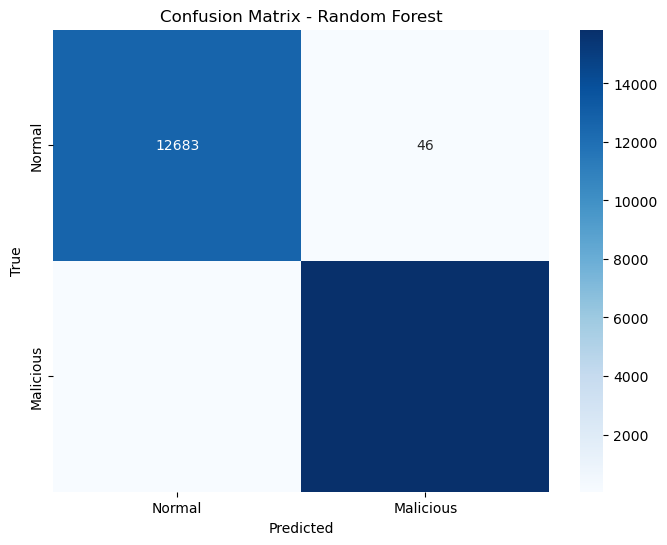

In [14]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Malicious'], 
            yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()